<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

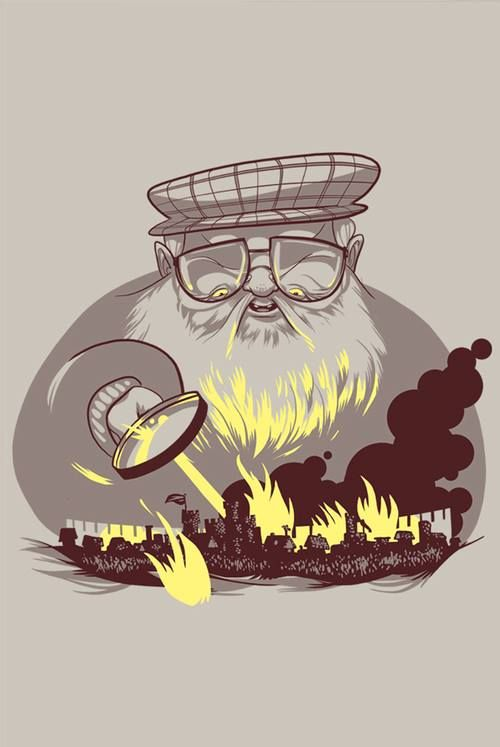

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [4]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 72.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 52.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [7]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

In [8]:
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [9]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


<BarContainer object of 25 artists>

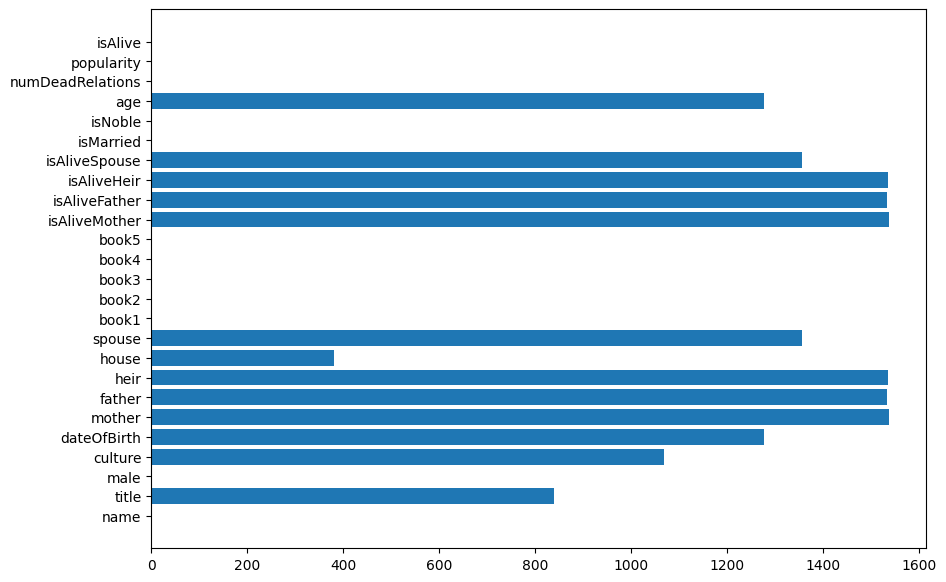

In [10]:
data_na = data.isna().sum()

plt.figure(figsize=(10,7))
plt.barh(data_na.index, data_na.values)

<Axes: xlabel='S.No'>

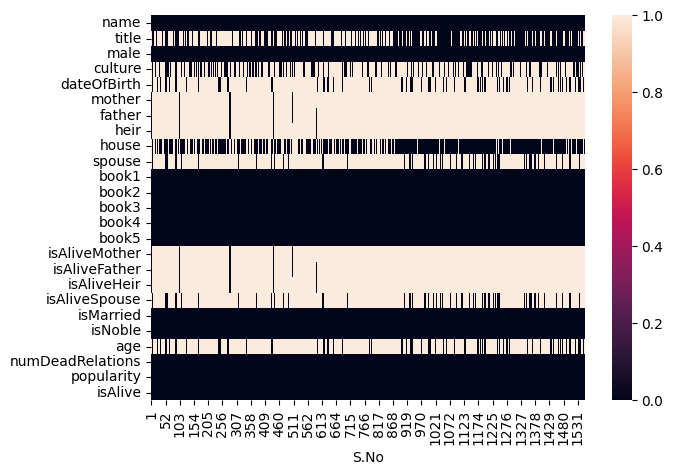

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(data.isna().transpose())

In [12]:
# удаляем неинформативные признаки
data.drop(columns=['name','mother','father','heir','spouse'], inplace=True)

In [13]:
# удаляем признаки в которых мало данных
data.drop(columns=['isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse'], inplace=True)

<BarContainer object of 16 artists>

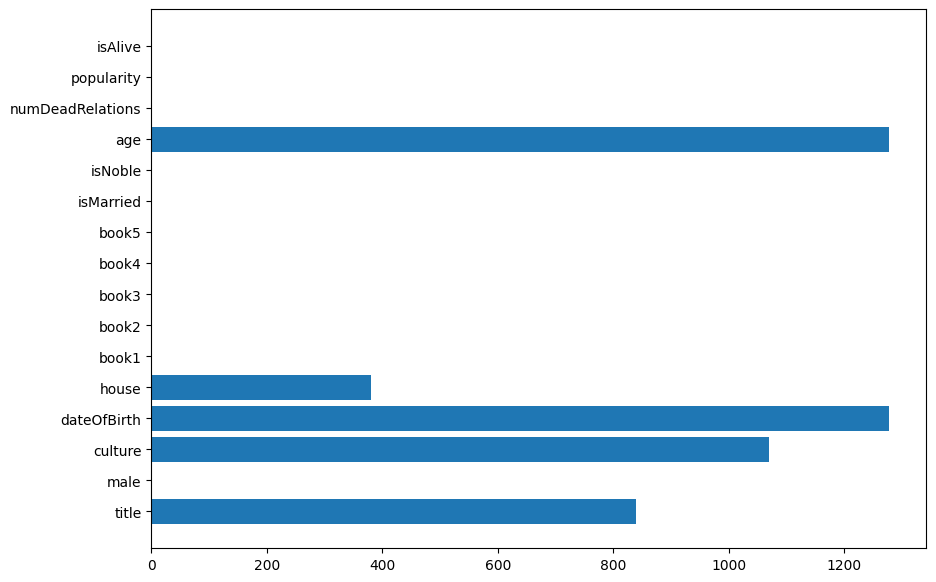

In [14]:
data_na = data.isna().sum()

plt.figure(figsize=(10,7))
plt.barh(data_na.index, data_na.values)

<Axes: xlabel='S.No'>

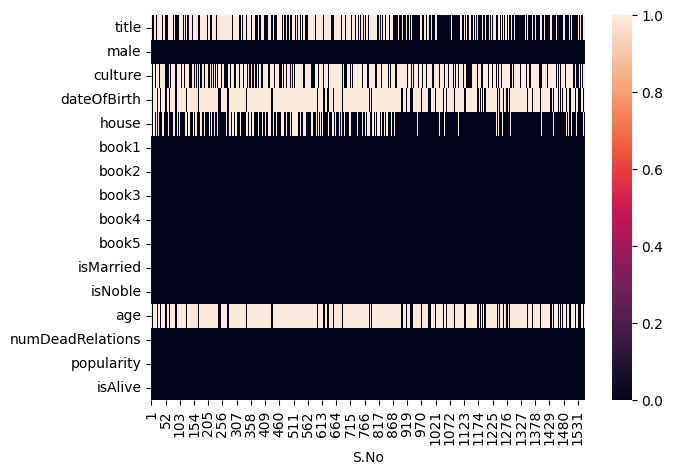

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(data.isna().transpose())

Отсутствие информации о дате рождения совпадает с отсутсвием возраста

<Axes: xlabel='S.No'>

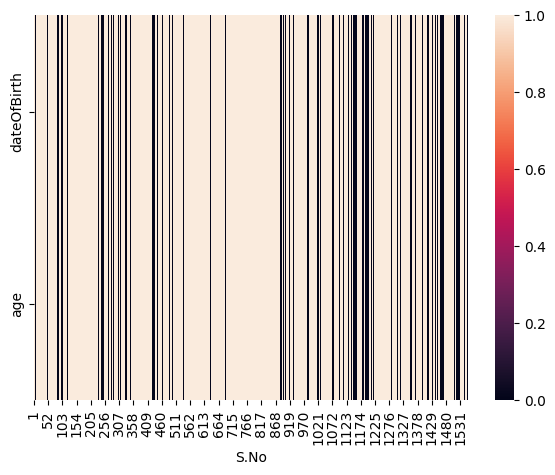

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(data[['dateOfBirth', 'age']].isna().transpose())

In [17]:
# dateOfBirth можно убрать
data.drop(columns=['dateOfBirth'], inplace=True)

<Axes: xlabel='S.No'>

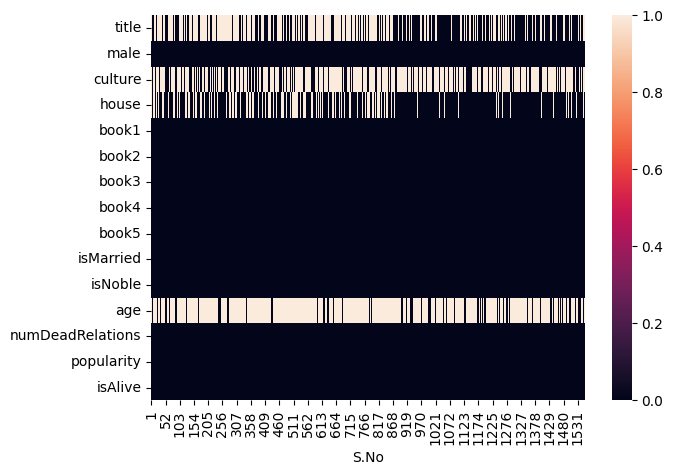

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(data.isna().transpose())

In [32]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 35.29032258064516
Медиана = 24.0


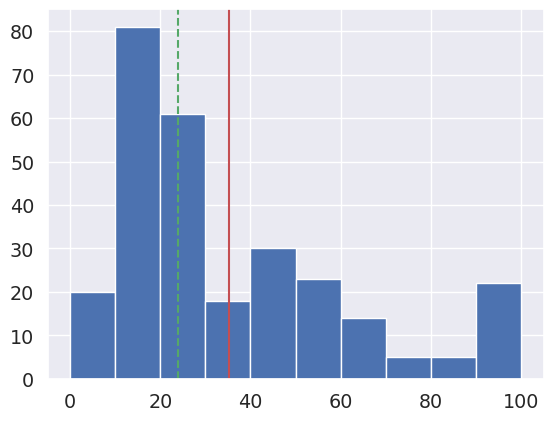

In [284]:
plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

In [35]:
# удалим возраст тоже мало информации
data.drop(columns=['age'], inplace=True)


# data = data[data['age'].isna() == False]
# data.shape

<Axes: xlabel='S.No'>

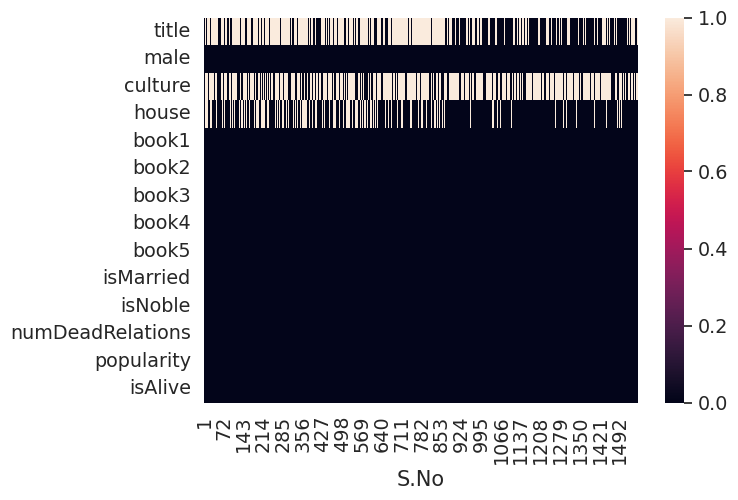

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(data.isna().transpose())

In [37]:
data.loc[(data['house'].isna(), 'house')] = 'Other house' # какой-то дом

In [289]:
data['title'].mode()

,title
0,Ser


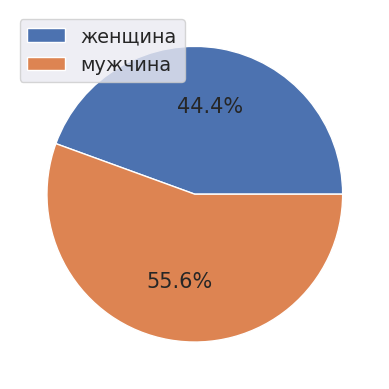

In [292]:
male_counts = data['male'].value_counts().sort_values()

# Строим круговую диаграмму
plt.pie(male_counts, autopct='%1.1f%%')
plt.legend(['женщина', 'мужчина'])
plt.show()

In [293]:
# посмотрим отдельно мужчин и женщин
data_female = data[data['male'] == 0]
data_male = data[data['male'] == 1]

data_male['title'].value_counts(), data_female['title'].value_counts()

(title
 Ser                                 34
 Prince                               5
 Prince of Dragonstone                4
 Lord of the Tides                    2
 Princess                             2
 Stonehelm                            2
 Lord of the Crossing                 1
 Prince of Winterfell                 1
 Volmark                              1
 Protector of the Realm               1
 master of ships                      1
 Riverrun                             1
 Prince of Dorne                      1
 Lord of Starfall                     1
 Master of coin                       1
 Castellan                            1
 Lord of Harrenhal                    1
 Heart's Home                         1
 Master-at-Arms                       1
 Lord                                 1
 Septon                               1
 Hand of the King                     1
 Bitterbridge                         1
 Grassy Vale                          1
 Cerwyn                          

In [294]:
na_percentage = round((data_male['title'].isna().sum() / len(data_male['title'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признака title для мужчин')

47.857 % пропущенных данных у признака title для мужчин


In [295]:
na_percentage = round((data_female['title'].isna().sum() / len(data_female['title'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признака title для женщин')

63.393 % пропущенных данных у признака title для женщин


In [297]:
data_male['culture'].value_counts(), data_female['culture'].value_counts()

(culture
 Northmen               13
 Valyrian               12
 Ironborn                4
 Rivermen                2
 Dornish                 2
 Vale mountain clans     1
 Westerman               1
 Westeros                1
 Reach                   1
 Wildling                1
 northmen                1
 Dornishmen              1
 Stormlands              1
 Valemen                 1
 Ghiscari                1
 Name: count, dtype: int64,
 culture
 Valyrian       9
 Northmen       8
 Dothraki       2
 Dornish        1
 Reach          1
 Rivermen       1
 Westermen      1
 Westerman      1
 Braavosi       1
 Dorne          1
 Westerlands    1
 Crannogmen     1
 Name: count, dtype: int64)

In [298]:
na_percentage = round((data_male['culture'].isna().sum() / len(data_male['culture'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признака culture для мужчин')

69.286 % пропущенных данных у признака culture для мужчин


In [299]:
na_percentage = round((data_female['culture'].isna().sum() / len(data_female['culture'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признака culture для женщин')

75.0 % пропущенных данных у признака culture для женщин


In [38]:
# и у мужчин и у женщин Ser лидирует проставим Ser
data.loc[(data['title'].isna(), 'title')] = 'Ser'

In [39]:
# и у мужчин и у женщин Northmen лидирует, проставим
data.loc[(data['culture'].isna(), 'culture')] = 'Northmen'

In [40]:
data.isna().sum()

,0
title,0
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


In [41]:
data.shape

(1557, 14)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [42]:
data['isPopular'] = 0
data.loc[(data['popularity']>0.5),'isPopular'] = 1
data[['popularity','isPopular']].head()

,popularity,isPopular
S.No,,
1,0.605351,1
2,0.896321,1
3,0.267559,0
4,0.183946,0
5,0.043478,0


In [43]:
data['boolDeadRelations'] = 0
data.loc[(data['numDeadRelations']>0),'boolDeadRelations'] = 1
data[['numDeadRelations','boolDeadRelations']].head()

,numDeadRelations,boolDeadRelations
S.No,,
1,11,1
2,1,1
3,0,0
4,0,0
5,0,0


In [44]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [45]:
for cult_name in cult:
  data['culture'] = data['culture'].replace(cult[cult_name], cult_name)

In [50]:
data['count_books'] = data['book1']+data['book2']+data['book3']+data['book4']+data['book5']

In [51]:
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,count_books
S.No,,,,,,,,,,,,,,,
1,Ser,1,Northmen,Other house,0,0,0,0,0,0,0,0,1,1,0
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1,1,5
3,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,1,0,0,1
4,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,0,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,0,0,1


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [54]:
data.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular',
       'boolDeadRelations', 'count_books'],
      dtype='object')

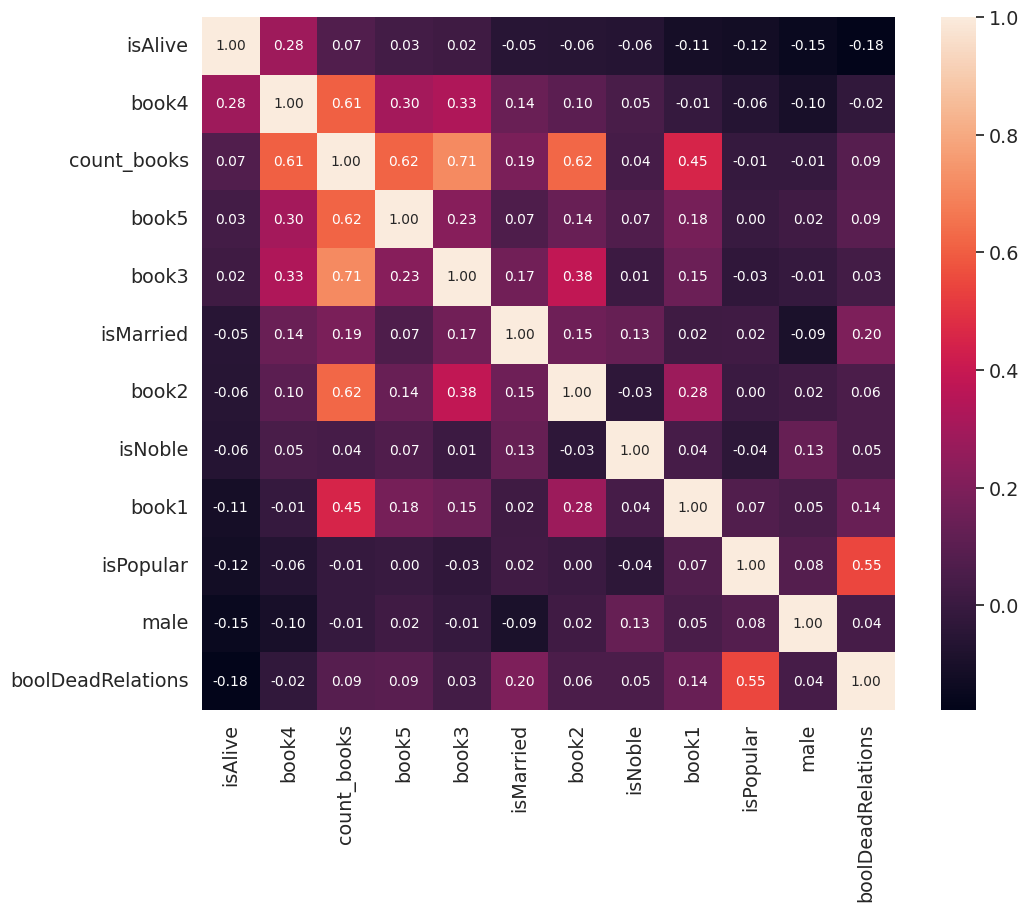

In [57]:
# correlation matrix
corrmat = data[['male', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular',
       'boolDeadRelations', 'count_books']].corr()
k = 14 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
data.drop(columns=['popularity','numDeadRelations', 'book1', 'book2', 'book3', 'book4',
       'book5'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

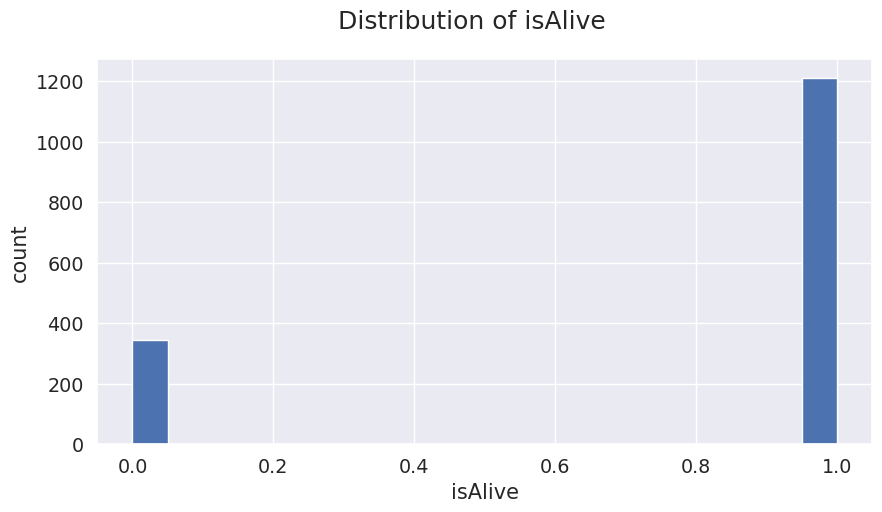

In [59]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [60]:
data.columns

Index(['title', 'male', 'culture', 'house', 'isMarried', 'isNoble', 'isAlive',
       'isPopular', 'boolDeadRelations', 'count_books'],
      dtype='object')

In [61]:
data[:3].head()

,title,male,culture,house,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,count_books
S.No,,,,,,,,,,
1,Ser,1,Northmen,Other house,0,0,0,1,1,0
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,5
3,Ser,1,Northmen,House Swyft,0,1,1,0,0,1


In [62]:
categorical_columns = ['title', 'male', 'culture', 'house', 'isMarried', 'isNoble', 'isPopular',
       'boolDeadRelations']
categorical_features = data[categorical_columns]
categorical_features.columns

Index(['title', 'male', 'culture', 'house', 'isMarried', 'isNoble',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

In [63]:
categorical_features

,title,male,culture,house,isMarried,isNoble,isPopular,boolDeadRelations
S.No,,,,,,,,
1,Ser,1,Northmen,Other house,0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1
3,Ser,1,Northmen,House Swyft,0,1,0,0
4,Queen,0,Northmen,House Arryn,1,1,0,0
5,Greenstone,0,Dornish,House Santagar,1,1,0,0
...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,Other house,0,1,0,0
1554,Ser,0,Northmen,Other house,0,0,0,0
1555,Ser,1,Northmen,House Seaworth,0,0,0,0


In [64]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [65]:
data[unprocessed_cat_features]

,title,culture,house
S.No,,,
1,Ser,Northmen,Other house
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,Northmen,House Swyft
4,Queen,Northmen,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,Northmen,Other house
1554,Ser,Northmen,Other house
1555,Ser,Northmen,House Seaworth


In [66]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

In [67]:
data.head()

,title,male,culture,house,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,count_books
S.No,,,,,,,,,,
1,163,1,24,302,0,0,0,1,1,0
2,115,1,31,106,1,1,1,1,1,5
3,163,1,24,244,0,1,1,0,0,1
4,145,0,24,21,1,1,0,0,0,0
5,53,0,7,219,1,1,1,0,0,1


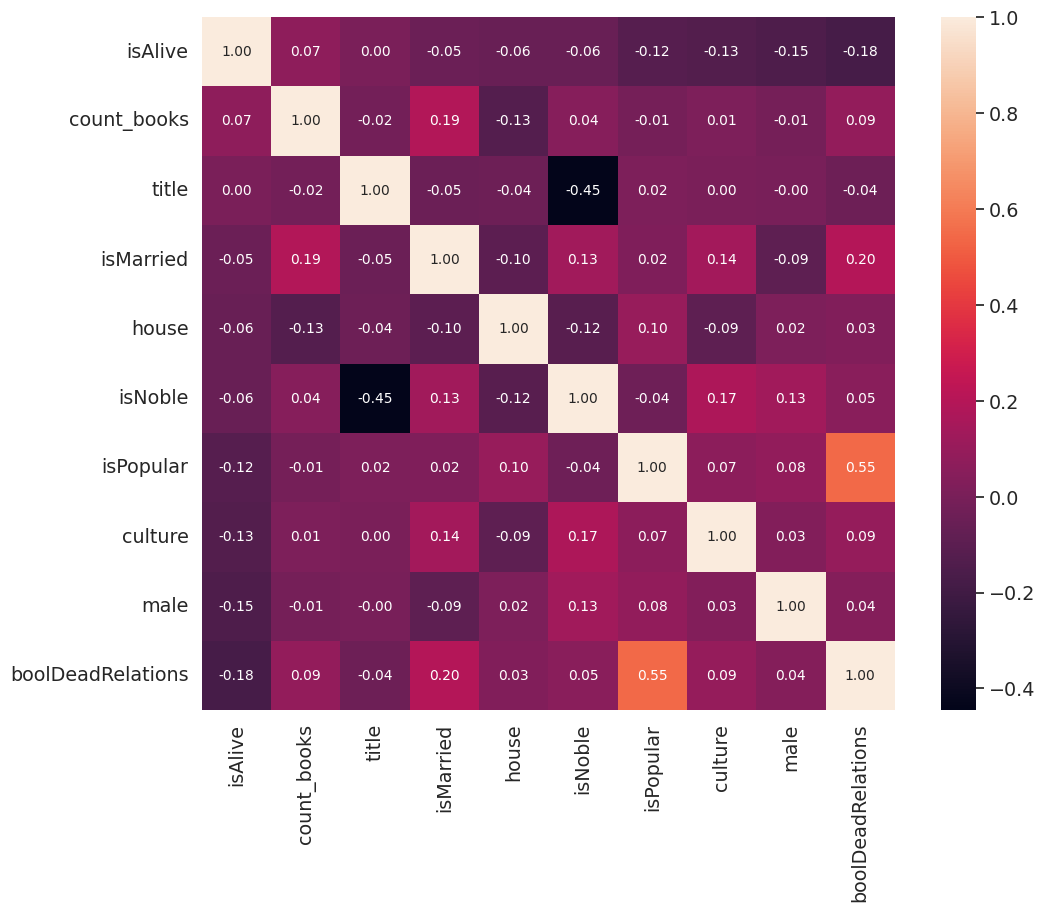

In [68]:
# correlation matrix
corrmat = data.corr()
k = 14 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [69]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


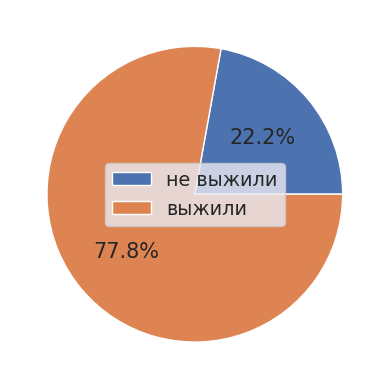

In [70]:
# Готовим данные для графика
isAlive_counts = data['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
plt.pie(isAlive_counts, autopct='%1.1f%%')
plt.legend(['не выжили', 'выжили'])
plt.show()

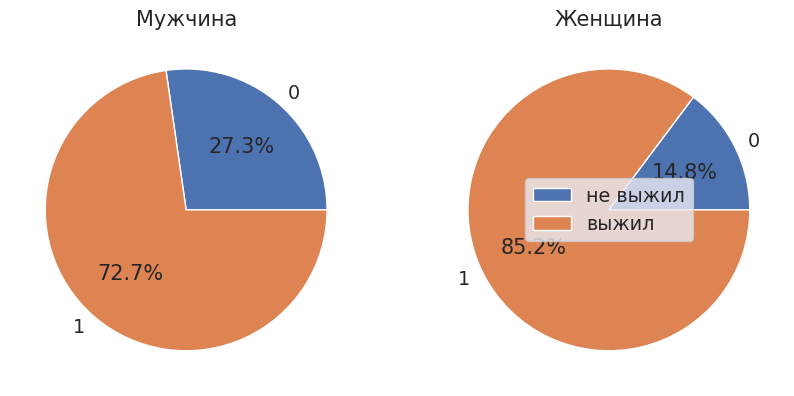

In [71]:
# Готовим данные для графика
data1 = data[data['male'] == 1]['isAlive'].value_counts().sort_values()
data2 = data[data['male'] == 0]['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("Мужчина")
ax2.set_title("Женщина")

plt.legend(['не выжил', 'выжил'])

plt.show()

In [72]:
data.columns

Index(['title', 'male', 'culture', 'house', 'isMarried', 'isNoble', 'isAlive',
       'isPopular', 'boolDeadRelations', 'count_books'],
      dtype='object')

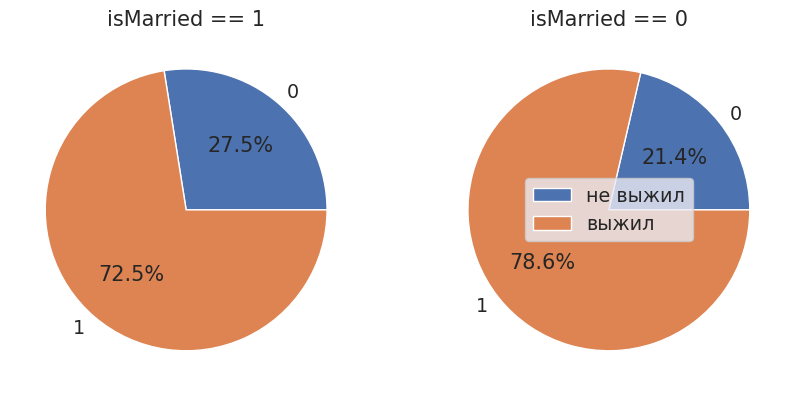

In [73]:
# Готовим данные для графика
data1 = data[data['isMarried'] == 1]['isAlive'].value_counts().sort_values()
data2 = data[data['isMarried'] == 0]['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isMarried == 1")
ax2.set_title("isMarried == 0")

plt.legend(['не выжил', 'выжил'])

plt.show()

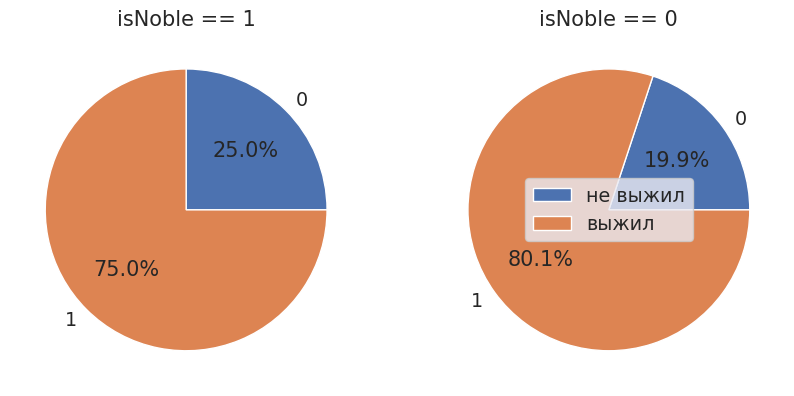

In [74]:
# Готовим данные для графика
data1 = data[data['isNoble'] == 1]['isAlive'].value_counts().sort_values()
data2 = data[data['isNoble'] == 0]['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isNoble == 1")
ax2.set_title("isNoble == 0")

plt.legend(['не выжил', 'выжил'])

plt.show()

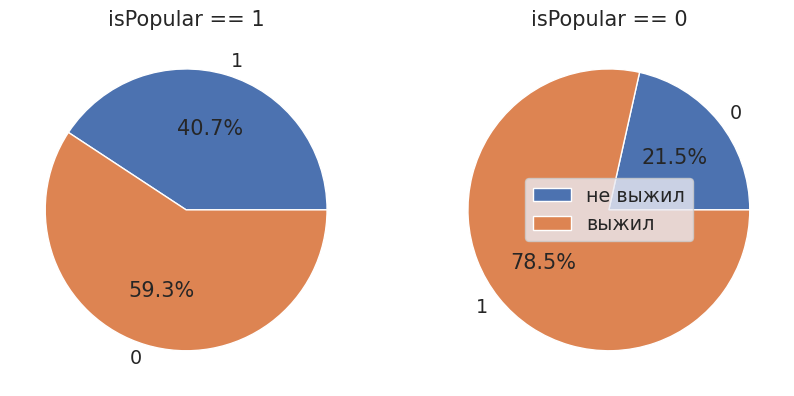

In [75]:
# Готовим данные для графика
data1 = data[data['isPopular'] == 1]['isAlive'].value_counts().sort_values()
data2 = data[data['isPopular'] == 0]['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isPopular == 1")
ax2.set_title("isPopular == 0")

plt.legend(['не выжил', 'выжил'])

plt.show()

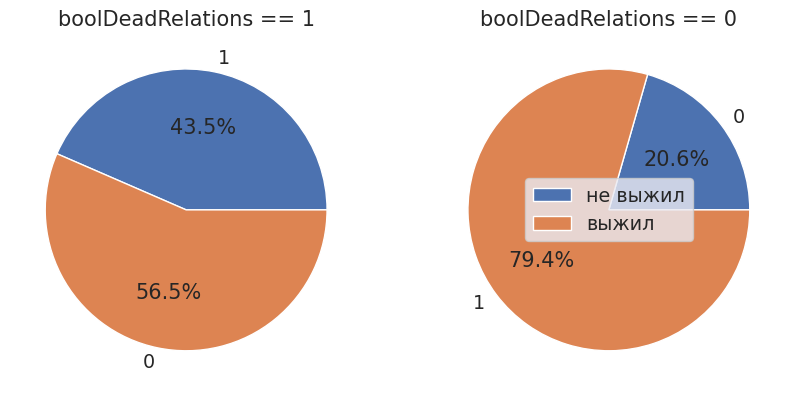

In [76]:
# Готовим данные для графика
data1 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts().sort_values()
data2 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts().sort_values()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("boolDeadRelations == 1")
ax2.set_title("boolDeadRelations == 0")

plt.legend(['не выжил', 'выжил'])

plt.show()

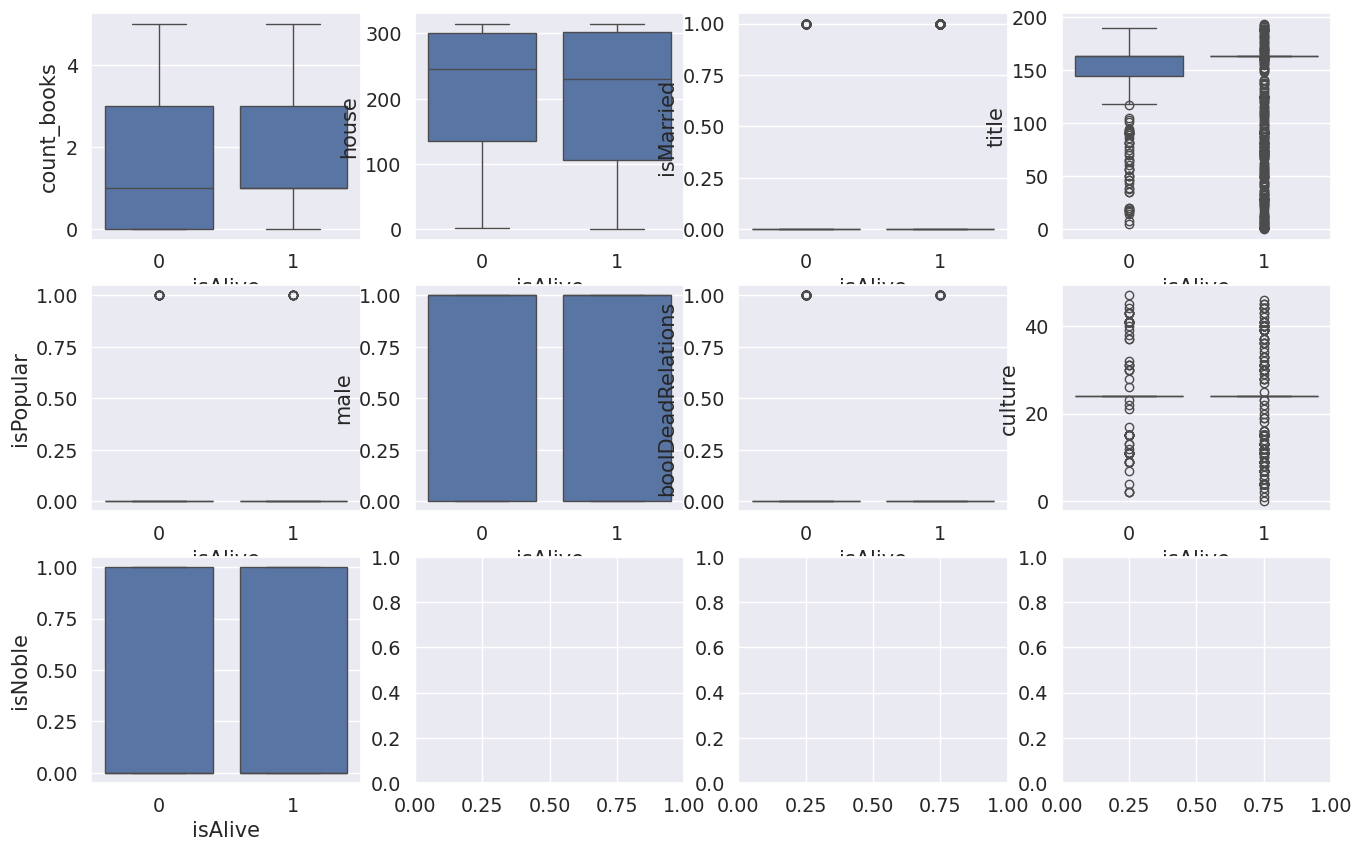

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

num_f = list(set(data.columns) - set(['isAlive','book1','book2','book3','book4','book5']))

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(num_f):
    sns.boxplot(x = 'isAlive', y = feat, data = data, ax = axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('isAlive')
    axes[idx // 4, idx % 4].set_ylabel(feat);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [79]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

In [80]:
data.columns

Index(['title', 'male', 'culture', 'house', 'isMarried', 'isNoble', 'isAlive',
       'isPopular', 'boolDeadRelations', 'count_books'],
      dtype='object')

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [1.46330924e+02 5.91967871e-01 2.27269076e+01 2.03320482e+02
 1.30120482e-01 4.41767068e-01 1.60642570e-02 4.01606426e-02
 1.81526104e+00]
После масштабирования:  [-3.43589503e-16  4.64599354e-16  1.26583260e-16  1.09149637e-16
 -1.54004431e-16  8.13271806e-17 -2.49867061e-16  2.80453929e-17
 -2.65071321e-17]


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [85]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [86]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [87]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [88]:
# Шаг 1. создание модели
clf_adaboost = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=0)

# Шаг 2. обучение модели
clf_adaboost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_adaboost.predict(X_test_scaled)

In [89]:
# Шаг 1. создание модели
clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0)

# Шаг 2. обучение модели
clf_random_forest.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_random_forest.predict(X_test_scaled)

In [90]:
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

# Шаг 1. создание модели
clf_gaussian_process = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Шаг 2. обучение модели
clf_gaussian_process.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_gaussian_process.predict(X_test_scaled)

In [91]:
# Шаг 1. создание модели
clf_gaussian_nb = GaussianNB()

# Шаг 2. обучение модели
clf_gaussian_nb.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_gaussian_nb.predict(X_test_scaled)

In [92]:
# Шаг 1. создание модели
clf_kn = KNeighborsClassifier(n_neighbors=3)

# Шаг 2. обучение модели
clf_kn.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_kn.predict(X_test_scaled)

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Шаг 1. создание модели
clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Шаг 2. обучение модели
clf_svc.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_svc.predict(X_test_scaled)

In [94]:
# Шаг 1. создание модели
clf_decision_tree = DecisionTreeClassifier(random_state=0)

# Шаг 2. обучение модели
clf_decision_tree.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_decision_tree.predict(X_test_scaled)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [95]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [96]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [97]:
# Шаг 3. Предсказание на тестовых данных
y_pred = clf_adaboost.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy : %.4f" % accuracy)

AdaBoost Accuracy : 0.7788


In [98]:
y_pred = clf_random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest Accuracy : %.4f" % accuracy)

RandomForest Accuracy : 0.7724


In [99]:
y_pred = clf_gaussian_process.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("GaussianProcess Accuracy : %.4f" % accuracy)

GaussianProcess Accuracy : 0.8013


In [100]:
y_pred = clf_gaussian_nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("GaussianNB Accuracy : %.4f" % accuracy)

GaussianNB Accuracy : 0.8077


In [101]:
y_pred = clf_kn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("KNeighbors Accuracy : %.4f" % accuracy)

KNeighbors Accuracy : 0.7404


In [102]:
y_pred = clf_svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy : %.4f" % accuracy)

SVC Accuracy : 0.7949


In [103]:
y_pred = clf_decision_tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("DecisionTree Accuracy : %.4f" % accuracy)

DecisionTree Accuracy : 0.7276


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [105]:
def search(X_train, y_train, X_test, y_test, model, param_grid):
  # создадим объект GridSearchCV
  gridsearch = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, refit=True, scoring=make_scorer(accuracy_score))

  # запустим поиск
  gridsearch.fit(X_train, y_train)
  means = gridsearch.cv_results_['mean_test_score']
  error = gridsearch.cv_results_['std_test_score']

  # выведем наилучшие параметры
  print(gridsearch.best_params_)

  best_model = gridsearch.best_estimator_

  print(f'accuracy_score train = {accuracy_score(y_train, best_model.predict(X_train))}')
  print(f'accuracy_score test = {accuracy_score(y_test, best_model.predict(X_test))}')

In [106]:
best_accuracy = {}

### LogisticRegression

In [107]:
logistic_regression.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [108]:
# опишем сетку, по которой будем искать
param_grid = {
    "solver": ["lbfgs"],
    "C": np.arange(1, 5),
    "penalty": ['l2'],
}
search(X_train_scaled, y_train, X_test_scaled, y_test, logistic_regression, param_grid)

param_grid = {
    "solver": ['saga'],
    "C": np.arange(1, 5),
    "penalty": ['l1', 'l2'],
}

search(X_train_scaled, y_train, X_test_scaled, y_test, logistic_regression, param_grid)

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy_score train = 0.7927710843373494
accuracy_score test = 0.7948717948717948
{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
accuracy_score train = 0.7927710843373494
accuracy_score test = 0.7948717948717948


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [109]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["LogisticRegression"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


### AdaBoostClassifier

In [110]:
clf_adaboost.get_params()

{'algorithm': 'SAMME',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 0}

In [111]:
# опишем сетку, по которой будем искать
param_grid = {
    "n_estimators": [50,100,150,200,250,300,350,400,450,500],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0],
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_adaboost, param_grid)

{'learning_rate': 1.0, 'n_estimators': 250}
accuracy_score train = 0.8024096385542169
accuracy_score test = 0.7980769230769231


In [112]:
# Шаг 1. создание модели
clf_adaboost = AdaBoostClassifier(algorithm="SAMME", learning_rate=0.1, n_estimators=400, random_state=0)

# Шаг 2. обучение модели
clf_adaboost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_adaboost.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["AdaBoostClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7596


### RandomForestClassifier

In [113]:
clf_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [115]:
# опишем сетку, по которой будем искать
param_grid = {
    "n_estimators": [10, 20, 30, 50, 75, 100, 150],
    "min_samples_split": range(2, 403, 20),
    "max_depth": [2, 4, 6, 8, 10]
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_random_forest, param_grid)

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}
accuracy_score train = 0.8144578313253013
accuracy_score test = 0.8076923076923077


In [116]:
# Шаг 1. создание модели
clf_random_forest = RandomForestClassifier(max_depth=6, min_samples_split=2, n_estimators=100, random_state=0)

# Шаг 2. обучение модели
clf_random_forest.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["RandomForestClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


### GaussianProcessClassifier

In [117]:
clf_gaussian_process.get_params()

{'copy_X_train': True,
 'kernel__k1': 1**2,
 'kernel__k2': RBF(length_scale=1),
 'kernel__k1__constant_value': 1.0,
 'kernel__k1__constant_value_bounds': (1e-05, 100000.0),
 'kernel__k2__length_scale': 1.0,
 'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
 'kernel': 1**2 * RBF(length_scale=1),
 'max_iter_predict': 100,
 'multi_class': 'one_vs_rest',
 'n_jobs': None,
 'n_restarts_optimizer': 0,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': 0,
 'warm_start': False}

### KNeighborsClassifier

In [118]:
clf_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [119]:
# опишем сетку, по которой будем искать
param_grid = {
    "n_neighbors": np.array(np.linspace(4, 25, 10), dtype='int')
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_kn, param_grid)

{'n_neighbors': 25}
accuracy_score train = 0.7863453815261044
accuracy_score test = 0.7852564102564102


In [120]:
# Шаг 1. создание модели
clf_kn = KNeighborsClassifier(n_neighbors=25)

# Шаг 2. обучение модели
clf_kn.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_kn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["KNeighborsClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


### DecisionTreeClassifier

In [121]:
clf_decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [122]:
# опишем сетку, по которой будем искать
param_grid = {
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_samples_split": range(2, 403, 20)
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_decision_tree, param_grid)

{'max_depth': 2, 'min_samples_split': 2}
accuracy_score train = 0.7951807228915663
accuracy_score test = 0.7756410256410257


In [123]:
# Шаг 1. создание модели
clf_decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=0)

# Шаг 2. обучение модели
clf_decision_tree.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_decision_tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["DecisionTreeClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


### XGBClassifier

In [124]:
import xgboost

clf_xgb = xgboost.XGBClassifier(n_estimators=200, random_state=0)

In [125]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [126]:
param_grid = {
    "n_estimators": [None, 100, 200, 300],
    "max_depth": [None, 2, 4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.06, 0.07, 0.08, 0.001],
    'gamma': [0, 0.50, 0.01],
    'subsample': [0.1, 1, 0.01],
    'colsample_bytree': [0.1, 1.0, 0.01],
    'reg_alpha': [0, 1, 2, 3]
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_xgb, param_grid)

KeyboardInterrupt: 

In [130]:
clf_xgb = xgboost.XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=200)
clf_xgb.fit(X_train_scaled, y_train)
y_pred = clf_xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["XGBClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


In [128]:
clf_xgb = xgboost.XGBClassifier(**{'colsample_bytree': 0.1, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': None, 'reg_alpha': 0, 'subsample': 1})
clf_xgb.fit(X_train_scaled, y_train)
y_pred = clf_xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["XGBClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


### Выберите лучшую модель.

In [131]:
best_accuracy

{'LogisticRegression': '0.7949',
 'AdaBoostClassifier': '0.7596',
 'RandomForestClassifier': '0.8077',
 'KNeighborsClassifier': '0.7853',
 'DecisionTreeClassifier': '0.7756',
 'XGBClassifier': '0.8045'}

### Короткая предобработка и обучение

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data.shape

NameError: name 'pd' is not defined

In [567]:
data.drop(columns=['name','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','dateOfBirth'], inplace=True)

In [568]:
data.loc[(data['title'].isna(), 'title')] = 'Ser'
data.loc[(data['culture'].isna(), 'culture')] = 'Northmen'
data.loc[(data['house'].isna(), 'house')] = 'Other house'
data.loc[(data['age'] < 0), 'age'] = 32
data.loc[(data['age'].isna(), 'age')] = 32
data['isPopular'] = 0
data.loc[(data['popularity']>0.5),'isPopular'] = 1
data['boolDeadRelations'] = 0
data.loc[(data['numDeadRelations']>0),'boolDeadRelations'] = 1

In [569]:
data.drop(columns=['popularity','numDeadRelations'], inplace=True)

In [570]:
for cult_name in cult:
  data['culture'] = data['culture'].replace(cult[cult_name], cult_name)

In [571]:
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,Ser,1,Northmen,Other house,0,0,0,0,0,0,0,32.0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,32.0,1,0,0
4,Queen,0,Northmen,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0


In [1]:
data['count_books'] = data['book1']+data['book2']+data['book3']+data['book4']+data['book5']

NameError: name 'data' is not defined

In [533]:
# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

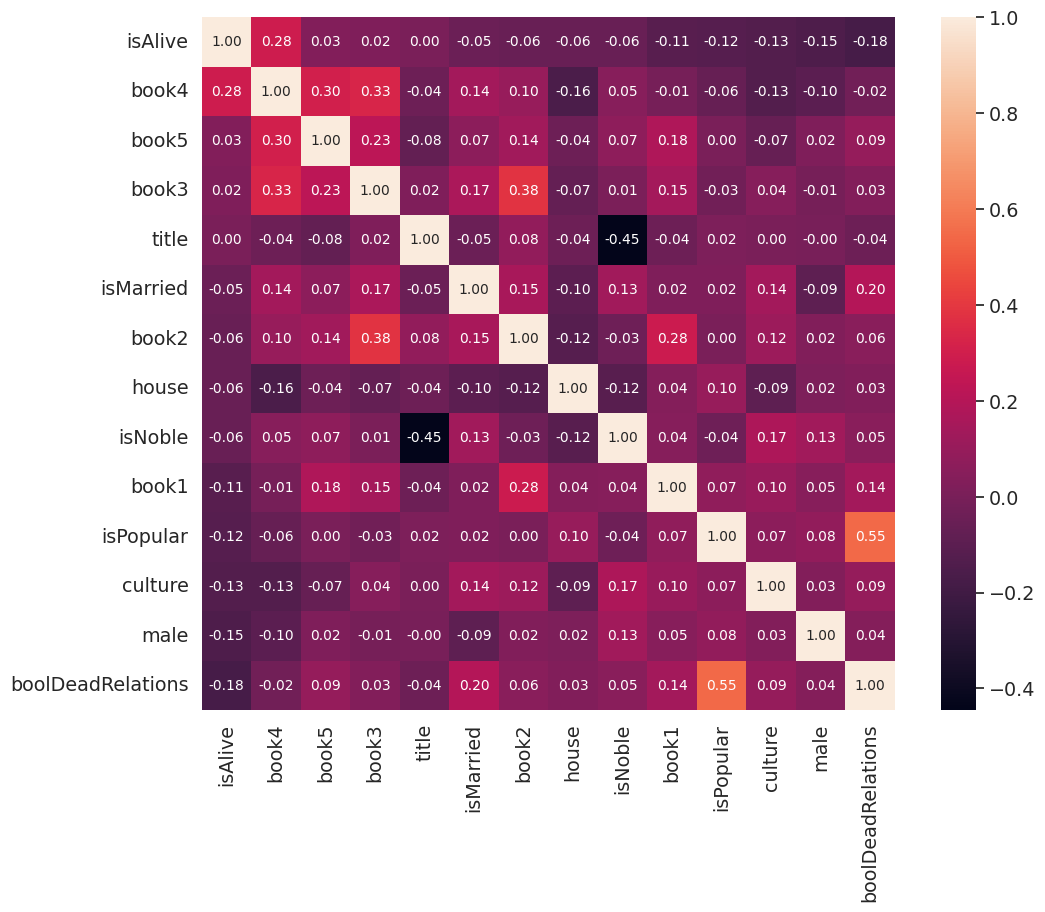

In [534]:
# correlation matrix
corrmat = data.corr()
k = 14 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [535]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [536]:
scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [537]:
param_grid = {
    "n_estimators": [None, 100, 200, 300],
    "max_depth": [None, 2, 4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.06, 0.07, 0.08, 0.001],
    # 'gamma': [0, 0.50, 0.01],
    # 'subsample': [0.1, 1, 0.01],
    # 'colsample_bytree': [0.1, 1.0, 0.01],
    # 'reg_alpha': [0, 1, 2, 3]
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_xgb, param_grid)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}
accuracy_score train = 0.8064257028112449
accuracy_score test = 0.7980769230769231


In [538]:
clf_xgb = xgboost.XGBClassifier(learning_rate=0.01, max_depth=2, n_estimators=300)
clf_xgb.fit(X_train_scaled, y_train)
y_pred = clf_xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["XGBClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [539]:
# опишем сетку, по которой будем искать
param_grid = {
    "n_estimators": [50,100,150,200,250,300,350,400,450,500],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0],
}

search(X_train_scaled, y_train, X_test_scaled, y_test, clf_adaboost, param_grid)

{'learning_rate': 0.1, 'n_estimators': 500}
accuracy_score train = 0.8040160642570281
accuracy_score test = 0.8012820512820513


In [540]:
# Шаг 1. создание модели
clf_adaboost = AdaBoostClassifier(algorithm="SAMME", learning_rate=0.1, n_estimators=500, random_state=0)

# Шаг 2. обучение модели
clf_adaboost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = clf_adaboost.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
best_accuracy["AdaBoostClassifier"] = "%.4f" % accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [132]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.98MB/s]


In [133]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [134]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [135]:
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

In [136]:
test.shape

(389, 24)

In [137]:
test.drop(columns=['name','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','dateOfBirth'], inplace=True)

In [138]:
test.drop(columns=['age'], inplace=True)

In [139]:
test.loc[(test['title'].isna(), 'title')] = 'Ser'
test.loc[(test['culture'].isna(), 'culture')] = 'Northmen'
test.loc[(test['house'].isna(), 'house')] = 'Other house'

In [403]:
# mean_Age = np.mean(test['age'].dropna().values)
# median_Age = np.quantile(test['age'].dropna().values,q=0.5)
# print(f"Среднее = {mean_Age}")
# print(f"Медиана = {median_Age}")

Среднее = -3701.0324675324673
Медиана = 32.0


In [408]:
# test.loc[(test['age'] < 0), 'age'] = 32
# test.loc[(test['age'].isna(), 'age')] = 32

In [140]:
test['isPopular'] = 0
test.loc[(test['popularity']>0.5),'isPopular'] = 1
test['boolDeadRelations'] = 0
test.loc[(test['numDeadRelations']>0),'boolDeadRelations'] = 1

In [141]:
test.drop(columns=['popularity','numDeadRelations'], inplace=True)

In [142]:
for cult_name in cult:
  test['culture'] = test['culture'].replace(cult[cult_name], cult_name)

In [143]:
test['count_books'] = test['book1']+test['book2']+test['book3']+test['book4']+test['book5']

In [144]:
test.drop(columns=['book1','book2','book3','book4','book5'], inplace=True)

In [145]:
test[unprocessed_cat_features]

,title,culture,house
S.No,,,
1558,Ser,Northmen,House Blackwood
1559,Ser,Asshai,R'hllor
1560,Ser,Northmen,Brotherhood without banners
1561,Ser,Northmen,House Trant
1562,Ser,Riverlands,House Frey
...,...,...,...
1942,Ser,Westeros,House Stark
1943,Ser,Northmen,House Bolton
1944,Ser,Northmen,Other house


In [146]:
# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  test[column] = label_encoding.fit_transform(test[column])

In [147]:
test.head()

,title,male,culture,house,isMarried,isNoble,isPopular,boolDeadRelations,count_books
S.No,,,,,,,,,
1558,94,0,24,22,0,0,0,0,1
1559,94,0,0,129,0,0,1,0,4
1560,94,0,24,6,0,0,0,0,2
1561,94,1,24,106,0,1,0,0,5
1562,94,1,32,50,1,0,0,0,5


In [148]:
X_prod = test.values
X_prod

array([[94,  0, 24, ...,  0,  0,  1],
       [94,  0,  0, ...,  1,  0,  4],
       [94,  0, 24, ...,  0,  0,  2],
       ...,
       [94,  1, 24, ...,  0,  0,  5],
       [94,  1, 24, ...,  0,  0,  3],
       [12,  1, 24, ...,  0,  1,  3]])

In [149]:
scaler = StandardScaler()
scaler.fit(X_prod)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_prod_scaled = scaler.transform(X_prod)

In [150]:
print('До масштабирования: ',X_prod.mean(axis=0))
print('После масштабирования: ',X_prod_scaled.mean(axis=0))

До масштабирования:  [79.23136247  0.73264781 23.48329049 74.11053985  0.19537275  0.54755784
  0.11568123  0.19537275  3.04113111]
После масштабирования:  [ 2.28323501e-16 -1.25577926e-17  0.00000000e+00  4.10982302e-17
  7.02094766e-17  6.39305803e-17 -1.07312046e-16  7.30635204e-17
  2.28323501e-17]


In [424]:
# Заполняем колонку isAlive предсказаниями лучшего алгоритма
submission['isAlive'] = clf_xgb.predict(X_prod_scaled)  # 0.6658097686375322

In [427]:
submission['isAlive'] = clf_adaboost.predict(X_prod_scaled)  # 0.6889460154241646

In [429]:
submission['isAlive'] = clf_random_forest.predict(X_prod_scaled) # 0.6683804627249358

In [442]:
submission['isAlive'] = clf_xgb.predict(X_prod_scaled) # 0.6169665809768637 O_O

In [446]:
submission['isAlive'] = clf_xgb.predict(X_prod_scaled) # 0.5784061696658098

In [450]:
submission['isAlive'] = clf_adaboost.predict(X_prod_scaled)  # 0.6272493573264781

In [155]:
submission['isAlive'] = clf_gaussian_process.predict(X_prod_scaled) # 0.6555269922879178 0.6298200514138818
submission.to_csv("/content/gaussian_process_new_submission.csv", index=False)

In [156]:
submission['isAlive'] = clf_gaussian_nb.predict(X_prod_scaled) # 0.6452442159383034 0.6246786632390745
submission.to_csv("/content/gaussian_nb_new_submission.csv", index=False)

In [157]:
submission['isAlive'] = clf_kn.predict(X_prod_scaled) # 0.6401028277634961 0.622107969151671
submission.to_csv("/content/kn_new_submission.csv", index=False)

In [158]:
submission['isAlive'] = clf_svc.predict(X_prod_scaled) # 0.6580976863753213 0.622107969151671
submission.to_csv("/content/svc_new_submission.csv", index=False)

In [159]:
submission['isAlive'] = clf_decision_tree.predict(X_prod_scaled) # 0.6041131105398457 0.6169665809768637
submission.to_csv("/content/decision_new_submission.csv", index=False)

In [511]:
# убрали title, culture, house, age

submission['isAlive'] = clf_xgb.predict(X_prod_scaled) # 0.6143958868894601

In [513]:
submission['isAlive'] = clf_adaboost.predict(X_prod_scaled)  # 0.6401028277634961

In [151]:
# убрали age

submission['isAlive'] = clf_xgb.predict(X_prod_scaled) # 0.6143958868894601  0.6143958868894601 0.6143958868894601

In [153]:
submission['isAlive'] = clf_adaboost.predict(X_prod_scaled)  # 0.6401028277634961 0.6143958868894601 0.6143958868894601

Как сохранить измененный Pandas DataFrame в csv файл:

In [154]:
submission.to_csv("/content/ada_new_submission.csv", index=False)

In [162]:
from datetime import datetime

def save_submit(model, model_name):
  dt_string = datetime.now().strftime("%d%m%Y_%H%M%S")

  submission['isAlive'] = model.predict(X_prod_scaled)
  submission.to_csv(f"/content/{dt_string}_{model_name}_submission.csv", index=False)